Ad : Malik Enes
Soyad : Alpaslan
Numara : 2312721066

------------ ORNEKLER -----------
x1: 32 x2: 15 y: 355.1
x1: 35 x2: 6 y: 83.9
x1: 19 x2: 20 y: 303.9
x1: 40 x2: 17 y: -100
x1: 34 x2: 15 y: 371.9

İterasyon  En İyi x1       En İyi x2       En İyi Skor (y)
1          34.0000         15.0000         371.9000       
2          34.0000         17.0270         434.3277       
3          34.0000         17.0270         434.3277       
4          34.0000         17.0270         434.3277       
5          34.0000         17.0270         434.3277       
6          32.0000         18.5010         455.4034       
7          32.0000         18.5010         455.4034       
8          32.0000         18.5010         455.4034       
9          32.0000         18.5010         455.4034       
10         32.0000         18.5010         455.4034       
11         32.0000         18.5010         455.4034       
12         32.0000         18.5010         455.4034       
13         32.0000         18.5010         455.4034       
14         32.0000         

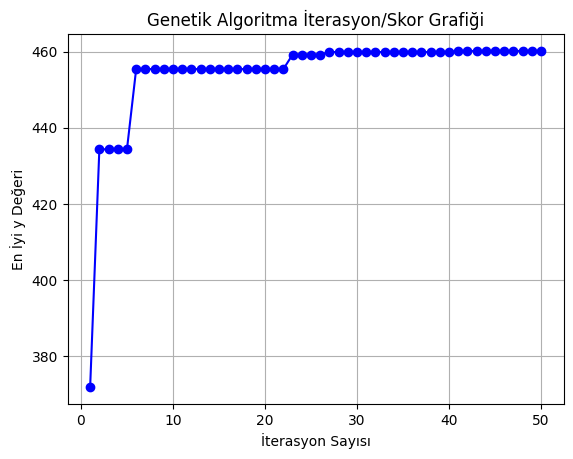

In [1]:
import random
import matplotlib.pyplot as plt  # Grafik kütüphanesini ekledik

# x1, x2, y
ornekler = []


def amac_fonksiyonu(x1, x2):
    if x1 < 15 or x1 > 40 or x2 < 5 or x2 > 20 or x1 * x2 > 600:
        return -100
    else:
        return x1 * x2 - 0.1 * (x1 ** 2) - 0.1 * (x2 ** 2)

def ornek_olustur(olusturulacak_ornek_sayisi):
    print("------------ ORNEKLER -----------")
    for _ in range(olusturulacak_ornek_sayisi):
        x1 = random.randint(15, 40)
        x2 = random.randint(5, 20)
        y = amac_fonksiyonu(x1, x2)

        print("x1:", x1, "x2:", x2, "y:", y)

        ornekler.append([x1, x2, y])

def en_iyi_indeksleri_bul( dizi ):

    havuz = []

    sirali_ornekler = sorted(
        enumerate(dizi),
        key=lambda x: x[1][2],
        reverse=True
    )

    indeksler = []

    for i in range(min(3, len(sirali_ornekler))):
        indeks = sirali_ornekler[i][0]
        indeksler.append(indeks);

    for _ in range(3) :
      havuz.append( dizi[indeksler[_]] );

    return havuz

def mutasyon(dizi, mutasyon_buyuklugu=5):
    for i in range(len(dizi)):
        sayi = random.uniform(-0.5, 0.5)

        degisecek = random.randint(0, 1)

        dizi[i][degisecek] += mutasyon_buyuklugu * sayi

        if dizi[i][0] < 15:
            dizi[i][0] = 15
        elif dizi[i][0] > 40:
            dizi[i][0] = 40


        if dizi[i][1] < 5:
            dizi[i][1] = 5
        elif dizi[i][1] > 20:
            dizi[i][1] = 20



def caprazlama( dizi ) :
  yeni_uyeler = []

  yeni_uyeler.append([dizi[0][0], dizi[1][1]]);
  yeni_uyeler.append([dizi[1][0], dizi[2][1]]);
  yeni_uyeler.append([dizi[2][0], dizi[0][1]]);

  mutasyon( yeni_uyeler);
  return yeni_uyeler




def baslat():
    global ornekler

    # --- EKLEME 1: Grafik için verileri tutacak liste ---
    y_gecmisi = []

    ornek_olustur(5)

    print("\n" + "="*60)
    print(f"{'İterasyon':<10} {'En İyi x1':<15} {'En İyi x2':<15} {'En İyi Skor (y)':<15}")
    print("="*60)

    for i in range(50):
        ebeveynler = en_iyi_indeksleri_bul(ornekler)

        cocuklar = caprazlama(ebeveynler)

        for cocuk in cocuklar:
            y = amac_fonksiyonu(cocuk[0], cocuk[1])
            cocuk.append(y)

        ornekler = ebeveynler + cocuklar

        en_iyi_birey = ebeveynler[0]

        # --- EKLEME 2: Her iterasyondaki en iyi sonucu kaydet ---
        y_gecmisi.append(en_iyi_birey[2])

        print(f"{i+1:<10} {en_iyi_birey[0]:<15.4f} {en_iyi_birey[1]:<15.4f} {en_iyi_birey[2]:<15.4f}")

    # --- EKLEME 3: Döngü bittikten sonra grafiği çiz ---
    plt.plot(range(1, 51), y_gecmisi, marker='o', linestyle='-', color='blue')
    plt.title('Genetik Algoritma İterasyon/Skor Grafiği')
    plt.xlabel('İterasyon Sayısı')
    plt.ylabel('En İyi y Değeri')
    plt.grid(True)
    plt.show()

baslat()